# **Actividad 5: Uso de software para búsqueda.**

Andrea Verónica Moreno España  2109443  *IMTC*


*   Gpo: 008
*   Hora: N4

In [2]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.15.0


In [3]:
#Importar datos
mnist_data = tf.keras.datasets.mnist.load_data(path="mnist.npz")
(train_images, train_labels), (test_images, test_labels) = mnist_data

11490434/11490434 [==============================] - 1s 0us/step


In [4]:
#Etiquetas
class_names = ['Zero','One', 'Two', 'Three', 'Four',
               'Five', 'Six', 'Seven', 'Eight', 'Nine']

In [5]:
#Explorar datos
train_images.shape
len(train_labels)
train_labels
test_images.shape
len(test_labels)

10000

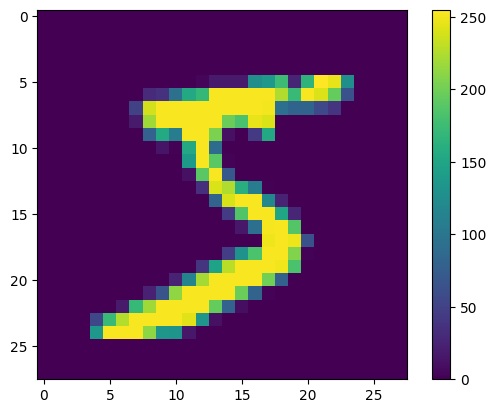

In [6]:
#Preprocesamiento
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [7]:
train_images = train_images / 255.0

test_images = test_images / 255.0

In [8]:
#Generar modelo
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')])

In [9]:
#Compilar modelo
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [10]:
#Cargar modelo
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 [==============================] - 7s 3ms/step - loss: 0.2615 - accuracy: 0.9260
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1143 - accuracy: 0.9662
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0789 - accuracy: 0.9761
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0586 - accuracy: 0.9820
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0448 - accuracy: 0.9858
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0357 - accuracy: 0.9887
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0289 - accuracy: 0.9911
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0232 - accuracy: 0.9930
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0189 - accuracy: 0.9940
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0168 - accurac

In [11]:
#Precisión
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.0742 - accuracy: 0.9783 - 917ms/epoch - 3ms/step

Test accuracy: 0.9782999753952026


In [12]:
#Predicciones
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [13]:
predictions[0]

array([0.08533686, 0.08533686, 0.08533686, 0.08533759, 0.08533686,
       0.08533686, 0.08533686, 0.23196766, 0.08533686, 0.08533686],
      dtype=float32)

In [14]:
np.argmax(predictions[0])

7

In [15]:
test_labels[0]

7

In [16]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

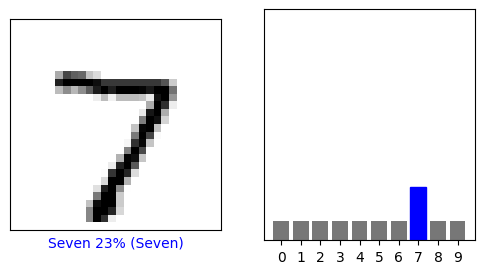

In [17]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

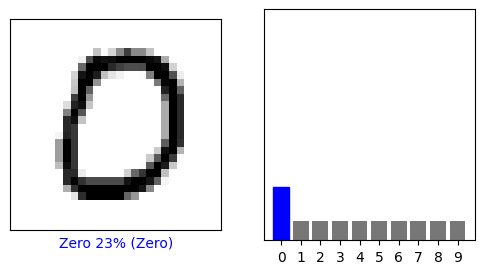

In [18]:
i = 10
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

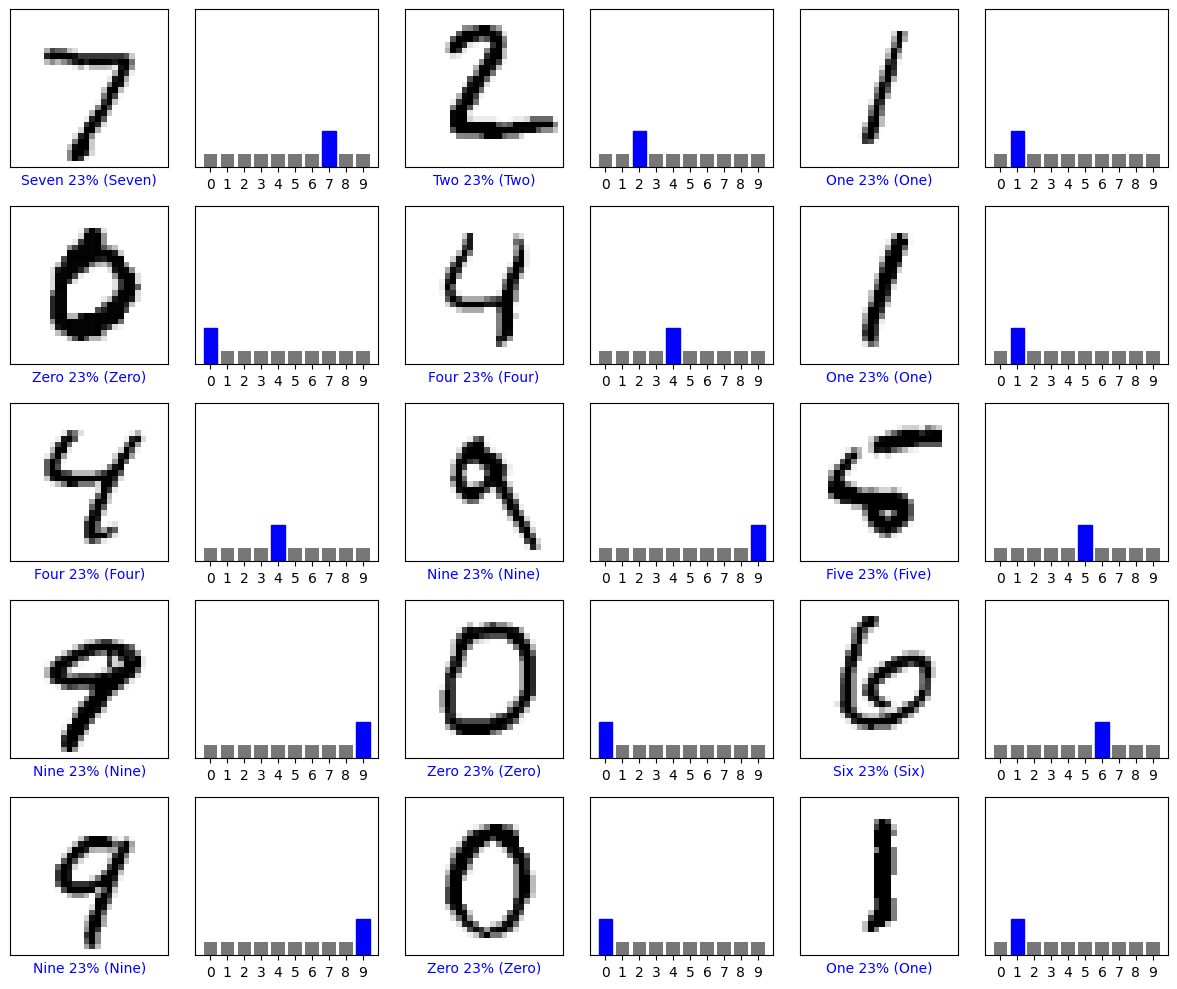

In [19]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [20]:
#Modelo entrenado
img = test_images[1]

print(img.shape)

(28, 28)


In [21]:
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [22]:
predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 24ms/step
[[0.08533674 0.08533677 0.23196921 0.08533674 0.08533674 0.08533674
  0.08533674 0.08533674 0.08533674 0.08533674]]


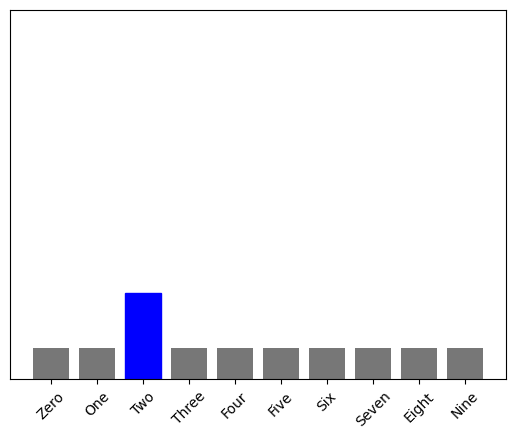

In [23]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [24]:
np.argmax(predictions_single[0])

2